# Forbered Dataen

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder


In [11]:
pd.read_csv('data/sample_submission.csv')

,id,outcome
0,1235,lived
1,1236,lived
2,1237,lived
3,1238,lived
4,1239,lived
...,...,...
819,2054,lived
820,2055,lived
821,2056,lived
822,2057,lived


In [2]:
data = pd.read_csv('data/train.csv')
testData = pd.read_csv('data/test.csv')

data

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1230,yes,adult,535246,38.5,129.0,48.0,cool,reduced,pale_pink,...,57.0,66.0,serosanguious,2.0,yes,2206,0,0,no,lived
1231,1231,yes,adult,528570,37.5,60.0,50.0,cool,reduced,pale_cyanotic,...,35.0,6.4,serosanguious,3.6,yes,2209,0,0,yes,died
1232,1232,yes,young,529685,37.5,84.0,40.0,normal,reduced,normal_pink,...,40.0,5.9,cloudy,7.0,yes,400,0,0,yes,lived
1233,1233,yes,adult,534784,38.1,70.0,16.0,normal,reduced,bright_red,...,58.0,74.0,cloudy,2.0,yes,2209,0,0,no,lived



Jeg kan se at den data jeg har at arbejde med er labelled data. Labelled er 'outcome', hvor resten bortset fra id, er features som har en indflydelse på outcome. 

### Drop id kolonne


In [3]:
# drop id kolonnen fordi jeg ik skal bruge den til model træning
if data.get('id') is not None:
    data = data.drop('id', axis=1)

if testData.get('id') is not None:
    testData = testData.drop('id', axis=1)

print(data.isna().sum())

surgery                    0
age                        0
hospital_number            0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       39
peripheral_pulse          60
mucous_membrane           21
capillary_refill_time      6
pain                      44
peristalsis               20
abdominal_distention      23
nasogastric_tube          80
nasogastric_reflux        21
nasogastric_reflux_ph      0
rectal_exam_feces        190
abdomen                  213
packed_cell_volume         0
total_protein              0
abdomo_appearance         48
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
outcome                    0
dtype: int64


In [4]:
print(testData.isna().sum())

surgery                    0
age                        0
hospital_number            0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       35
peripheral_pulse          47
mucous_membrane           13
capillary_refill_time      6
pain                      29
peristalsis               19
abdominal_distention      22
nasogastric_tube          64
nasogastric_reflux        14
nasogastric_reflux_ph      0
rectal_exam_feces        125
abdomen                  154
packed_cell_volume         0
total_protein              0
abdomo_appearance         31
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64


Her kan jeg se hvor mange manglende værdier der er for hver feature. Dem skal jeg have gjort noget ved.

### Visualiser kategoriske kolonner med manglende værdier

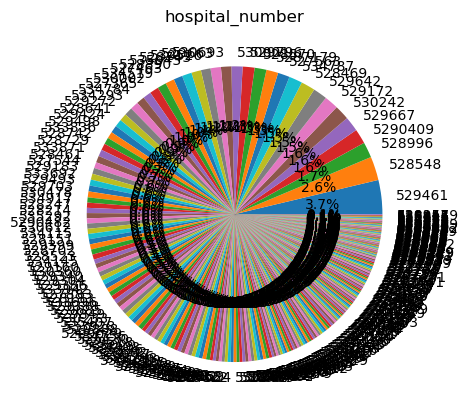

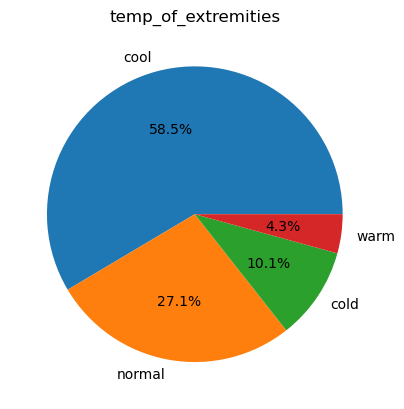

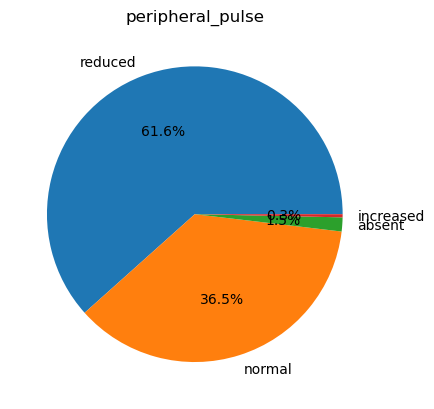

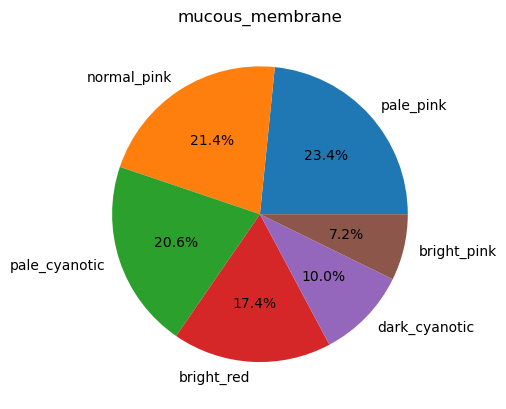

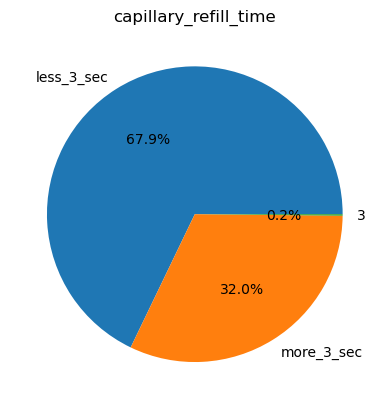

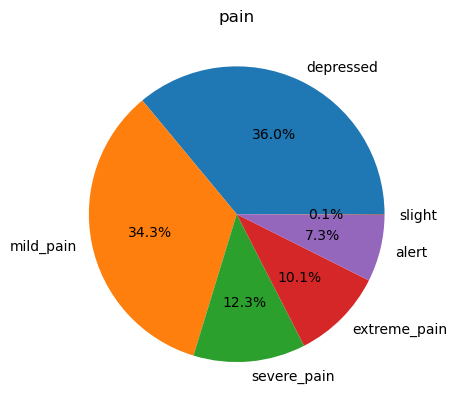

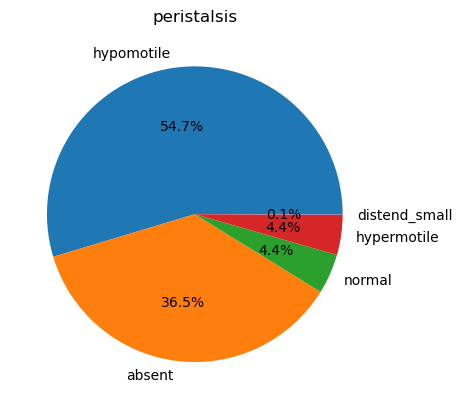

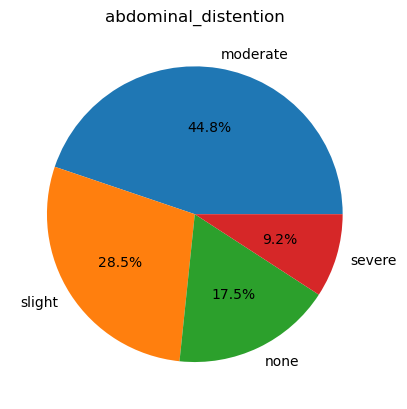

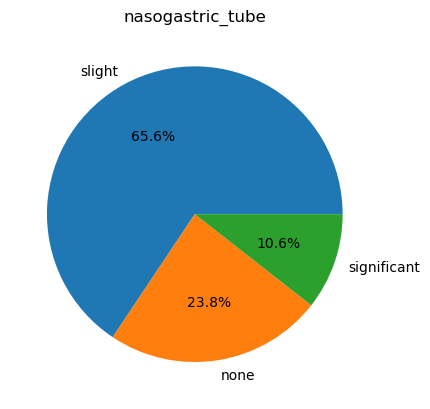

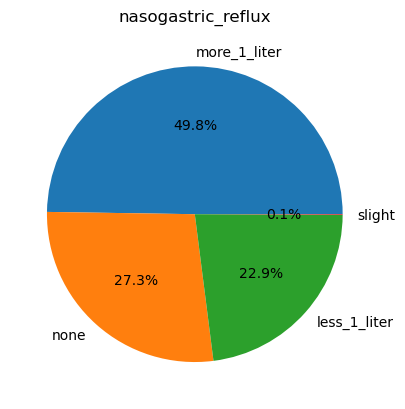

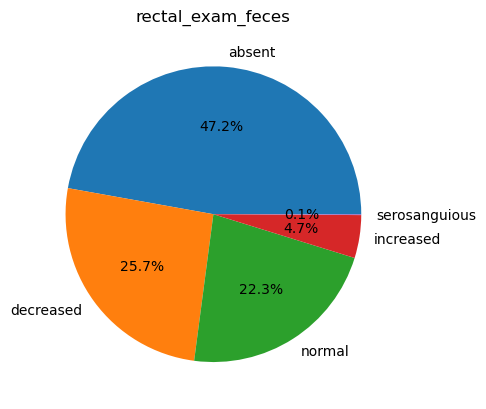

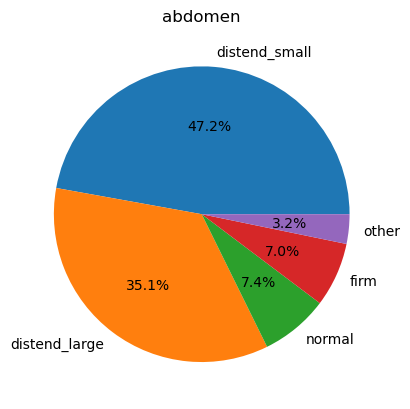

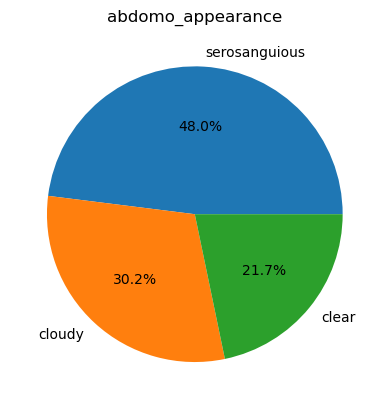

In [5]:
categorical_columns = ['hospital_number','temp_of_extremities','peripheral_pulse','mucous_membrane','capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'abdomo_appearance']
for column in categorical_columns:
    categorical_column_counts = data[column].value_counts()

    plt.pie(categorical_column_counts.values, labels=categorical_column_counts.index, autopct='%1.1f%%')

    plt.title(column)

    plt.show()

### Visuelle Observationer

hospital_number har ikke nogen manglende værdier, men jeg er lidt i tvivl om hvad jeg helt skal gøre med den. Det er en kategorisk kolonne, med mange kategorier af tal. Jeg tror umiddelbart at jeg skal lade den være da den allerede er naturligt kategoriseret. Jeg ved ikke om det ville have en betydning at køre label encoding på den, så kategorierne blev mere læselige fra 1 og op. Men det tror jeg ikke alligevel, fordi hvad nu hvis man får test data ind som ikke har alle kategorier. så tror jeg det ville gå galt med encoding og prediction af det.

Alle de andre kolonner som har manglende værdier, er kategoriske kolonner med mere end 2 værdier, så der vil jeg tilføje en ny kategori kaldet "Not Known".

### Label Encode

In [6]:
for column in data:
    print(column, data[column].dtype)

surgery object
age object
hospital_number int64
rectal_temp float64
pulse float64
respiratory_rate float64
temp_of_extremities object
peripheral_pulse object
mucous_membrane object
capillary_refill_time object
pain object
peristalsis object
abdominal_distention object
nasogastric_tube object
nasogastric_reflux object
nasogastric_reflux_ph float64
rectal_exam_feces object
abdomen object
packed_cell_volume float64
total_protein float64
abdomo_appearance object
abdomo_protein float64
surgical_lesion object
lesion_1 int64
lesion_2 int64
lesion_3 int64
cp_data object
outcome object


In [7]:
enc = OrdinalEncoder()

for column in data:
    if data[column].dtype == 'object':
        data[column] = data[column].astype(str)
        data[column] = enc.fit_transform(data[column].values.reshape(-1, 1))

for column in testData:
    if testData[column].dtype == 'object':
        testData[column] = testData[column].astype(str)
        testData[column] = enc.fit_transform(testData[column].values.reshape(-1, 1))

data

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,1.0,0.0,530001,38.1,132.0,24.0,1.0,4.0,2.0,2.0,...,57.0,8.5,3.0,3.4,1.0,2209,0,0,0.0,0.0
1,1.0,0.0,533836,37.5,88.0,12.0,1.0,3.0,5.0,2.0,...,33.0,64.0,3.0,2.0,1.0,2208,0,0,0.0,1.0
2,1.0,0.0,529812,38.3,120.0,28.0,1.0,4.0,6.0,1.0,...,37.0,6.4,3.0,3.4,1.0,5124,0,0,0.0,2.0
3,1.0,0.0,5262541,37.1,72.0,30.0,0.0,4.0,6.0,2.0,...,53.0,7.0,1.0,3.9,1.0,2208,0,0,1.0,2.0
4,0.0,0.0,5299629,38.0,52.0,48.0,3.0,3.0,4.0,1.0,...,47.0,7.3,1.0,2.6,0.0,0,0,0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1.0,0.0,535246,38.5,129.0,48.0,1.0,4.0,6.0,2.0,...,57.0,66.0,3.0,2.0,1.0,2206,0,0,0.0,2.0
1231,1.0,0.0,528570,37.5,60.0,50.0,1.0,4.0,5.0,1.0,...,35.0,6.4,3.0,3.6,1.0,2209,0,0,1.0,0.0
1232,1.0,1.0,529685,37.5,84.0,40.0,3.0,4.0,4.0,1.0,...,40.0,5.9,1.0,7.0,1.0,400,0,0,1.0,2.0
1233,1.0,0.0,534784,38.1,70.0,16.0,3.0,4.0,1.0,1.0,...,58.0,74.0,1.0,2.0,1.0,2209,0,0,0.0,2.0


In [8]:
data.isna().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
outcome                  0
dtype: int64

In [9]:
testData.isna().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

ikke flere manglende værdier

### Gem i ny csv

In [10]:
data.to_csv('data/train_cleaned.csv', index=False)
testData.to_csv('data/test_cleaned.csv', index=False)